22H1120016 - Trần Đăng Nam

Lab 4-4 Gom cụm bài hát mp3 

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from tqdm import tqdm

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [5]:
# Bước 1: Đọc đường dẫn vào file - cho gom 1 folder - vì dữ liệu lớn
Audio = "../fma_small/000/"

# Hàm trích xuất đặc trưng
def ext_features(file_path):
    try:
        y, sr = librosa.load(file_path, duration=30)
    
        #Trích xuất đặc trưng
        MFCC = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
        # Chroma_stft: Đặc trưng biểu diễn năng lượng phổ ở 12 lớp sắc độ
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
        # Spectral Contrast: Đặc trưng đo lường sự khác biệt về cường độ phổ
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
        # Ghép các đặc trưng trên thành một vector duy nhất
        feature_vector = np.hstack([
            np.mean(MFCC, axis=1), # Vector giá trị trung bình của 23 hệ số MFCC
            np.mean(chroma, axis=1), # Vector giá trị trung bình của 12 đặc trưng
            np.mean(spectral_contrast, axis=1) # Vector chứa giá trị trung bình của đặc trưng Spectral Contrast
        ])
    
        # Trả về vector đặc trưng đã trích xuất
        return feature_vector

    except Exception as e:
        # Xử lý lỗi 
        print(f"Lỗi xử lý file {file_path}: {e}")
        return None # Trả về None nếu không trích xuất được đặc trưng

# Duyệt file và trích xuất đặc trung
song_features = [] # DS lưu trữ các vector đặc trưng của bài hát
song_names = [] # DS lưu trữ tên file của các bài hát

# Duyệt qua all file và thư mực con
for filename in tqdm(os.listdir(Audio)):
    # Kiểm tra xem file có phải là file MP3 không (kết thúc bằng ".mp3")
    if filename.endswith(".mp3"):
        # Tạo đường dẫn đầy đủ đến file MP3
        file_path = os.path.join(Audio, filename)

        # Gọi hàm để trích xuất đặc trưng từ file MP3 hiện tại
        features = ext_features(file_path)

        # Kiểm tra xem việc trích xuất đặc trưng có thành công không (features không phải là None)
        if features is not None:
            # Thêm vector đặc trưng vào danh sách song_features
            song_features.append(features)
            # Thêm tên file bài hát vào danh sách song_names
            song_names.append(filename)

100%|██████████| 62/62 [00:10<00:00,  5.80it/s]


Đã chuẩn hóa các dữ liệu đặc trưng
Đã gom cụm hoàn tất


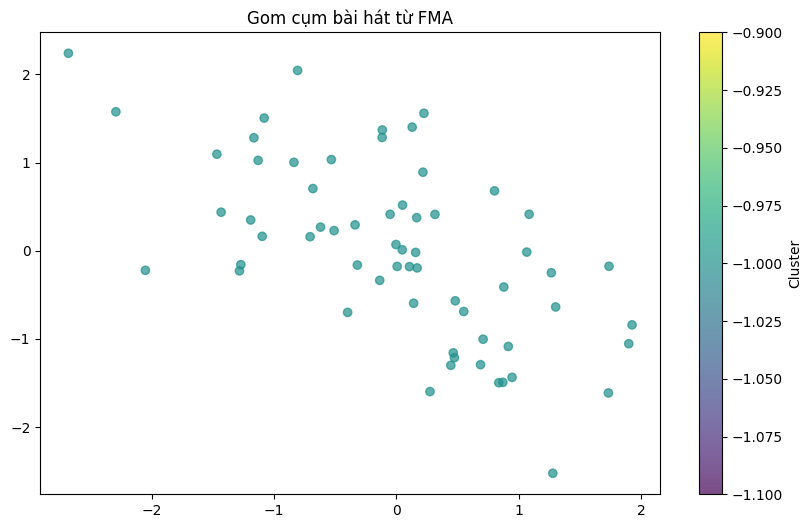

In [6]:
# Bước 2. Gom cụm
# Chuyển dữ liệu thành Dataframe để dễ dàng xử lý
df = pd.DataFrame(song_features)
df ['song_names'] = song_names

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
feature_columns = df.columns[:-1] #Lấy tên các cột đặc trưng
fma_scaled = scaler.fit_transform(df[feature_columns]) # Chuẩn hóa các đặc trưng
print("Đã chuẩn hóa các dữ liệu đặc trưng")

# Gom cụm bằng DBSCAN
eps = 0.000000001 # bán kính DBSCAN
min_sample_value = 10 # Giá trị ví dụ cho min_sample
fma_DBSCAN = DBSCAN(eps,min_samples=min_sample_value) # Thực hiện gom cụm

# Áp dụng DBSCAN trên dữ liệu đã chuẩn hóa
df["cluster"] = fma_DBSCAN.fit_predict(fma_scaled)
print("Đã gom cụm hoàn tất")

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 6))
plt.scatter(fma_scaled[:, 0], fma_scaled[:, 1], c=df["cluster"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Gom cụm bài hát từ FMA")
plt.show()


Đã giảm chiều dữ liệu thành 2D thành công


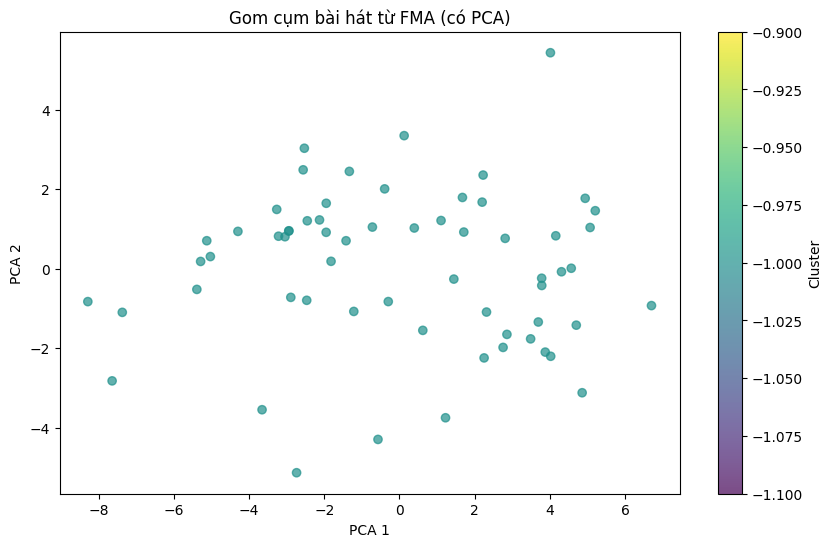

In [7]:

# Giảm chiều dữ liệu dùng PCA
pca = PCA(n_components=2) # Chuyển thành 2 chiều
reduced_features = pca.fit_transform(fma_scaled)
print("Đã giảm chiều dữ liệu thành 2D thành công")

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df["cluster"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Gom cụm bài hát từ FMA (có PCA)")
plt.show()